In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

### Read in the data

In [3]:
DATA_RAW = pd.read_csv('../source data/new data/CP ETL output.csv')
mask = ((DATA_RAW['ONS_Census_2011'].str[0] == 'E') + (DATA_RAW['ONS_Census_2011'].str[0] == 'W'))
DATA_ENG_WAL_RAW = DATA_RAW[mask]
DATA_ENG_WAL = DATA_ENG_WAL_RAW[DATA_ENG_WAL_RAW['ONS_Census_2011'].notnull()]

# "test" subset — all records with known ONS codes
data_eng = DATA_ENG_WAL.copy()
#kick out the outlier: Milton Keynes
data_eng = data_eng[data_eng['ONS_Census_2011'] != 'E06000042']

/home/adam/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


### Tidy up

I don't like punctuation in column names. Also they shouldn't start with a number

In [4]:
to_replace = (':', '/', ';', ',', '(', ')')

for col in data_eng.columns:
    if col not in ['LA_Population', 'ONS_Census_2011']:
        newname = col
        if newname[0].isdigit():
            newname = 'p_{0}'.format(newname)
        newname = newname.replace(' ', '_')
        for item in to_replace:
            newname = newname.replace(item, '')

        data_eng = data_eng.rename(columns={col: newname})

#I don't like this very long variable name, I'll rename it:
data_eng = data_eng.rename(columns={'All_persons_Highest_Level_of_Qualification_All_categories_Highest_level_of_qualification_measures_Value_Total': 'edu_highest'})

In [5]:
data_eng.columns

Index(['Country', 'County_Name', 'ONS_Census_2011', 'Local_Authority', 'LA_Type', 'LA_Population', 'LA_Area_Hec', 'TOTAL_Presented_Young_ppl_2014', 'TOTAL_Assessed_Young_ppl_2014', 'TOTAL_Presented_Young_ppl_2013', 'TOTAL_Assessed_Young_ppl_2013', 'TOTAL_Presented_Young_ppl_2012', 'TOTAL_Assessed_Young_ppl_2012', 'Missing_Data_Presented_HS_2014', 'Missing_Data_Presented_CS_2014', 'Missing_Data_Assessed_HS_2014', 'Missing_Data_Assessed_CS_2014', 'Missing_Data_Presented_HS_2013', 'Missing_Data_Presented_CS_2013', 'Missing_Data_Assessed_HS_2013', 'Missing_Data_Assessed_CS_2013', 'Missing_Data_Presented_HS_2012', 'Missing_Data_Presented_CS_2012', 'Missing_Data_Assessed_HS_2012', 'Missing_Data_Assessed_CS_2012', 'unemployed_age_16_and_over', 'unemployment_age_16_to_24', 'unemployment_age_25_to_34', 'never_worked_age_16_and_over', 'never_worked_age_16_to_24', 'never_worked_age_25_to_34', 'IMD_SCORE', 'RANK_OF_IMD_SCORE_where_1_is_most_deprived', 'All_categories_Ethnic_group_of_HRP', 'White_T

Define relevant columns (done by hand):

In [6]:
target_columns = ['TOTAL_Presented_Young_ppl_2014', 'TOTAL_Assessed_Young_ppl_2014']
unempl_columns = ['unemployed_age_16_and_over', 'unemployment_age_16_to_24', 'unemployment_age_25_to_34', 'never_worked_age_16_and_over', 'never_worked_age_16_to_24', 'never_worked_age_25_to_34']
ethno_columns = ['All_categories_Ethnic_group_of_HRP', 'White_Total', 'White_EnglishWelshScottishNorthern_IrishBritish', 'White_Irish', 'White_Gypsy_or_Irish_Traveller', 'White_Other_White', 'Mixedmultiple_ethnic_group_Total', 'Mixedmultiple_ethnic_group_White_and_Black_Caribbean', 'Mixedmultiple_ethnic_group_White_and_Black_African', 'Mixedmultiple_ethnic_group_White_and_Asian', 'Mixedmultiple_ethnic_group_Other_Mixed', 'AsianAsian_British_Total', 'AsianAsian_British_Indian', 'AsianAsian_British_Pakistani', 'AsianAsian_British_Bangladeshi', 'AsianAsian_British_Chinese', 'AsianAsian_British_Other_Asian', 'BlackAfricanCaribbeanBlack_British_Total', 'BlackAfricanCaribbeanBlack_British_African', 'BlackAfricanCaribbeanBlack_British_Caribbean', 'BlackAfricanCaribbeanBlack_British_Other_Black', 'Other_ethnic_group_Total', 'Other_ethnic_group_Arab', 'Other_ethnic_group_Any_other_ethnic_group']
edu_columns = ['edu_highest', '_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value', 'All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value', 'All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value', '_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value']

All analysis should be done on normalised data, e.g. numbers divided by LA_POPULATION.

In [7]:
columns_to_normalise = unempl_columns + ethno_columns + edu_columns
for column in columns_to_normalise:
    data_eng[column] = data_eng[column]/data_eng['LA_Population']

In [8]:
data_eng.head(5)

,Country,County_Name,ONS_Census_2011,Local_Authority,LA_Type,LA_Population,LA_Area_Hec,TOTAL_Presented_Young_ppl_2014,TOTAL_Assessed_Young_ppl_2014,TOTAL_Presented_Young_ppl_2013,...,Other_ethnic_group_Arab,Other_ethnic_group_Any_other_ethnic_group,edu_highest,_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value,_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value
0,England,Hartlepool,E06000001,Hartlepool,Unitary,92028,9386.11,NaN,NaN,NaN,...,0.000304,0.000239,0.806581,0.247294,0.109282,0.130308,0.044291,0.100795,0.141946,0.032664
1,England,Middlesbrough,E06000002,Middlesbrough,Unitary,138412,5387.47,NaN,NaN,NaN,...,0.002312,0.001589,0.797684,0.238433,0.108755,0.122034,0.035214,0.105063,0.147906,0.040278
2,England,Derby,E06000015,Derby,Unitary,248752,7803.11,109,183,148,...,0.001355,0.003526,0.796279,0.191882,0.105704,0.115300,0.039369,0.103871,0.192782,0.047372
3,England,Redcar and Cleveland,E06000003,Redcar and Cleveland,Unitary,135177,24489.51,NaN,NaN,NaN,...,0.000141,0.000237,0.821227,0.233398,0.110574,0.134823,0.047094,0.107799,0.155448,0.032091
4,England,Stockton-on-Tees,E06000004,Stockton-on-Tees,Unitary,191610,20393.06,NaN,NaN,NaN,...,0.000449,0.000741,0.806341,0.191681,0.112024,0.135948,0.042195,0.109347,0.183967,0.031178


### P1E data

Read them in and merge with the rest.

In [9]:
p1e = pd.read_csv('../source data/new data/p1e.csv')

p1e_columns = []
for year in (2012, 2013, 2014):
    for i in range(4):
        p1e_columns.append('p_{0}_{1}'.format(year, i+1))
        p1e_columns.append('p_{0}_{1}_all'.format(year, i+1))
        
p1e_columns = p1e_columns[2:]

data_eng = data_eng.merge(p1e[['ONS_Census_2011'] + p1e_columns], on='ONS_Census_2011', how='left')
for column in p1e_columns:
    data_eng[column] = data_eng[column]/data_eng['LA_Population']

### Shelter data

If you want, you can import data from Shelter folder. You can then add them to predictor variables with:
```python
for col in to_join:
    predictors.append(to_join[col][1])
```

In [10]:
test = data_eng.copy()

# the structure of this dictionary is as follows: {filename: [[column_name_in_csv], desired_column_name]}
to_join = {'Average weekly council rents': [['13/14'], 'avg_council_rents'],
           'Council homes sold through Right To Buy': [['13/14'], 'right_to_buy'],
           'Housing Benefit claimants - all': [['housing_benefit'], 'housing_benefit']}

for metric in to_join:
    temp = pd.read_csv('../source data/new data/Shelter_Data/{0}.csv'.format(metric))
    temp = temp[['ONS'] + to_join[metric][0]].dropna().rename(columns={'ONS': 'ONS_Census_2011'})
    test = test.merge(temp, how='left', on = 'ONS_Census_2011')
    
    rename_cols = {to_join[metric][0][0]: to_join[metric][1]}
    test = test.rename(columns=rename_cols)

#which columns should be normalised?
columns_to_normalise_new = ['right_to_buy', 'housing_benefit']
for column in columns_to_normalise_new:
    test[column] = test[column].astype(float)/test['LA_Population']

Define predictors

In [11]:
predictors = unempl_columns + ethno_columns + edu_columns + ['LA_Population']
# only using one column from p1e data (total homeless from 2014.3), the rest is patchy
predictors.append('p_2014_3_all')
predictors.append('IMD_SCORE')
#for col in to_join:
#    predictors.append(to_join[col][1])
    
pd.set_option('display.max_columns', None) # show all columns

# make a subset where all predictors and "presented" (target) != NaN
test_filled = test.dropna(subset=predictors, how='any')

Add the "training" subset, i.e. where we know "presented" numbers.

In [12]:
train_filled = test_filled[test_filled['Missing_Data_Presented_HS_2014'] == 0]
#train_filled = test_filled.dropna(subset=['TOTAL_Presented_Young_ppl_2014'])

In [13]:
train_filled

,Country,County_Name,ONS_Census_2011,Local_Authority,LA_Type,LA_Population,LA_Area_Hec,TOTAL_Presented_Young_ppl_2014,TOTAL_Assessed_Young_ppl_2014,TOTAL_Presented_Young_ppl_2013,TOTAL_Assessed_Young_ppl_2013,TOTAL_Presented_Young_ppl_2012,TOTAL_Assessed_Young_ppl_2012,Missing_Data_Presented_HS_2014,Missing_Data_Presented_CS_2014,Missing_Data_Assessed_HS_2014,Missing_Data_Assessed_CS_2014,Missing_Data_Presented_HS_2013,Missing_Data_Presented_CS_2013,Missing_Data_Assessed_HS_2013,Missing_Data_Assessed_CS_2013,Missing_Data_Presented_HS_2012,Missing_Data_Presented_CS_2012,Missing_Data_Assessed_HS_2012,Missing_Data_Assessed_CS_2012,unemployed_age_16_and_over,unemployment_age_16_to_24,unemployment_age_25_to_34,never_worked_age_16_and_over,never_worked_age_16_to_24,never_worked_age_25_to_34,IMD_SCORE,RANK_OF_IMD_SCORE_where_1_is_most_deprived,All_categories_Ethnic_group_of_HRP,White_Total,White_EnglishWelshScottishNorthern_IrishBritish,White_Irish,White_Gypsy_or_Irish_Traveller,White_Other_White,Mixedmultiple_ethnic_group_Total,Mixedmultiple_ethnic_group_White_and_Black_Caribbean,Mixedmultiple_ethnic_group_White_and_Black_African,Mixedmultiple_ethnic_group_White_and_Asian,Mixedmultiple_ethnic_group_Other_Mixed,AsianAsian_British_Total,AsianAsian_British_Indian,AsianAsian_British_Pakistani,AsianAsian_British_Bangladeshi,AsianAsian_British_Chinese,AsianAsian_British_Other_Asian,BlackAfricanCaribbeanBlack_British_Total,BlackAfricanCaribbeanBlack_British_African,BlackAfricanCaribbeanBlack_British_Caribbean,BlackAfricanCaribbeanBlack_British_Other_Black,Other_ethnic_group_Total,Other_ethnic_group_Arab,Other_ethnic_group_Any_other_ethnic_group,edu_highest,_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value,_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value,p_2012_2,p_2012_2_all,p_2012_3,p_2012_3_all,p_2012_4,p_2012_4_all,p_2013_1,p_2013_1_all,p_2013_2,p_2013_2_all,p_2013_3,p_2013_3_all,p_2013_4,p_2013_4_all,p_2014_1,p_2014_1_all,p_2014_2,p_2014_2_all,p_2014_3,p_2014_3_all,p_2014_4,p_2014_4_all,avg_council_rents,right_to_buy,housing_benefit
2,England,Derby,E06000015,Derby,Unitary,248752,7803.11,109.000000,183.000000,148.000000,246.000000,33.000000,103.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.342638,0.068623,0.033314,0.074894,0.039746,0.009475,35.70,5977,0.411136,0.351161,0.330313,0.005624,0.000330,0.014894,0.007103,0.004012,0.000583,0.001439,0.001069,0.034372,0.013632,0.013640,0.000631,0.001897,0.004571,0.013620,0.004748,0.007642,0.001230,0.004880,0.001355,0.003526,0.796279,0.191882,0.105704,0.115300,0.039369,0.103871,0.192782,0.047372,0.000060,0.000117,0.000076,0.000189,0.000068,0.000213,0.000068,0.000213,0.000121,0.000306,NaN,0.000338,0.000084,0.000289,0.000092,0.000338,NaN,0.000281,0.000088,0.000302,NaN,0.000318,71.89,0.000555,0.084388
7,England,Halton,E06000006,Halton,Unitary,125746,7909.52,18.000000,18.000000,2.000000,16.000000,7.000000,20.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.342341,0.054896,0.028224,0.063565,0.036152,0.005169,62.33,639,0.423966,0.416514,0.409500,0.003181,0.000135,0.003698,0.003109,0.001026,0.000660,0.000604,0.000819,0.002593,0.000795,0.000183,0.000127,0.000899,0.000588,0.001272,0.000382,0.000811,0.000080,0.000477,0.000095,0.000382,0.801767,0.215721,0.134994,0.148728,0.030530,0.100345,0.141492,0.029957,0.000016,0.000167,0.000016,0.000072,0.000087,0.000278,0.000087,0.000278,0.000040,0.000119,NaN,0.000127,0.000040,0.000119,0.000000,NaN,0.000048,0.000103,NaN,0.000072,NaN,0.000080,NaN,NaN,0.100781
9,England,Warrington,E06000007,Warrington,Unitary,202228,18065.39,148.000000,149.0

Explore cross-correlations:

In [14]:
train_filled[predictors].corr()

,unemployed_age_16_and_over,unemployment_age_16_to_24,unemployment_age_25_to_34,never_worked_age_16_and_over,never_worked_age_16_to_24,never_worked_age_25_to_34,All_categories_Ethnic_group_of_HRP,White_Total,White_EnglishWelshScottishNorthern_IrishBritish,White_Irish,White_Gypsy_or_Irish_Traveller,White_Other_White,Mixedmultiple_ethnic_group_Total,Mixedmultiple_ethnic_group_White_and_Black_Caribbean,Mixedmultiple_ethnic_group_White_and_Black_African,Mixedmultiple_ethnic_group_White_and_Asian,Mixedmultiple_ethnic_group_Other_Mixed,AsianAsian_British_Total,AsianAsian_British_Indian,AsianAsian_British_Pakistani,AsianAsian_British_Bangladeshi,AsianAsian_British_Chinese,AsianAsian_British_Other_Asian,BlackAfricanCaribbeanBlack_British_Total,BlackAfricanCaribbeanBlack_British_African,BlackAfricanCaribbeanBlack_British_Caribbean,BlackAfricanCaribbeanBlack_British_Other_Black,Other_ethnic_group_Total,Other_ethnic_group_Arab,Other_ethnic_group_Any_other_ethnic_group,edu_highest,_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value,_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value,LA_Population,p_2014_3_all,IMD_SCORE
unemployed_age_16_and_over,1.000000,0.197895,0.073522,0.206583,0.146016,0.087170,0.199064,0.258579,0.316526,-0.363711,-0.128862,-0.305597,-0.295456,-0.191960,-0.299773,-0.318136,-0.309393,-0.117267,-0.042618,0.026208,-0.068048,-0.254004,-0.261880,-0.253859,-0.256490,-0.235389,-0.240435,-0.155455,-0.124564,-0.161683,0.269966,0.673621,0.266984,0.257824,0.332568,0.163319,-0.464911,-0.166922,0.092350,-0.219682,0.346962
unemployment_age_16_to_24,0.197895,1.000000,0.781704,0.794452,0.919509,0.735516,-0.306120,-0.578341,-0.577724,0.386588,-0.124714,0.344773,0.484310,0.491046,0.400038,0.461015,0.412104,0.592788,0.499708,0.373070,0.496112,0.442989,0.449572,0.386931,0.389675,0.362723,0.357566,0.463251,0.417551,0.448589,-0.147858,-0.034500,-0.328254,-0.561677,-0.451918,0.404219,0.084251,0.451371,0.440514,0.352961,0.322378
unemployment_age_25_to_34,0.073522,0.781704,1.000000,0.932326,0.883854,0.953985,-0.248640,-0.729376,-0.767217,0.601938,-0.130772,0.538695,0.731191,0.729774,0.659839,0.652492,0.638742,0.730780,0.522875,0.560320,0.660825,0.513532,0.635717,0.663739,0.658970,0.633018,0.610591,0.650796,0.538453,0.664702,-0.385646,0.068547,-0.247662,-0.621685,-0.605037,-0.152327,0.006801,0.727764,0.518081,0.516525,0.423431
never_worked_age_16_and_over,0.206583,0.794452,0.932326,1.000000,0.936910,0.971482,-0.315800,-0.768886,-0.778426,0.563285,-0.132944,0.482667,0.663029,0.649349,0.589420,0.615418,0.578952,0.786359,0.608737,0.591520,0.654235,0.472266,0.651954,0.625158,0.610071,0.605598,0.581232,0.690751,0.567049,0.708708,-0.376596,0.078476,-0.320493,-0.625138,-0.590543,-0.130218,0.024356,0.693500,0.575210,0.429195,0.396905
never_worked_age_16_to_24,0.146016,0.919509,0.883854,0.936910,1.000000,0.883653,-0.359270,-0.731021,-0.737144,0.522034,-0.120365,0.451681,0.608032,0.580819,0.523172,0.590640,0.535602,0.743706,0.600694,0.494242,0.620319,0.517074,0.608405,0.528219,0.522523,0.504289,0.490995,0.618167,0.525724,0.621150,-0.321724,-0.025569,-0.353455,-0.632127,-0.580867,0.085030,0.092984,0.592157,0.506131,0.400400,0.338324
never_worked_age_25_to_34,0.087170,0.735516,0.953985,0.971482,0.883653,1.000000,-0.328310,-0.806876,-0.817804,0.603255,-0.126672,0.507189,0.709181,0.706681,0.630302,0.652459,0.610763,0.811080,0.590179,0.664321,0.694102,0.481665,0.684492,0.682399,0.670146,0.657655,0.630864,0.695718,0.559670,0.722016,-0.430050,0.030081,-0.326871,-0.652275,-0.603083,-0.201101,0.049590,0.7348

Specifically, let's see correlation with the target variable:

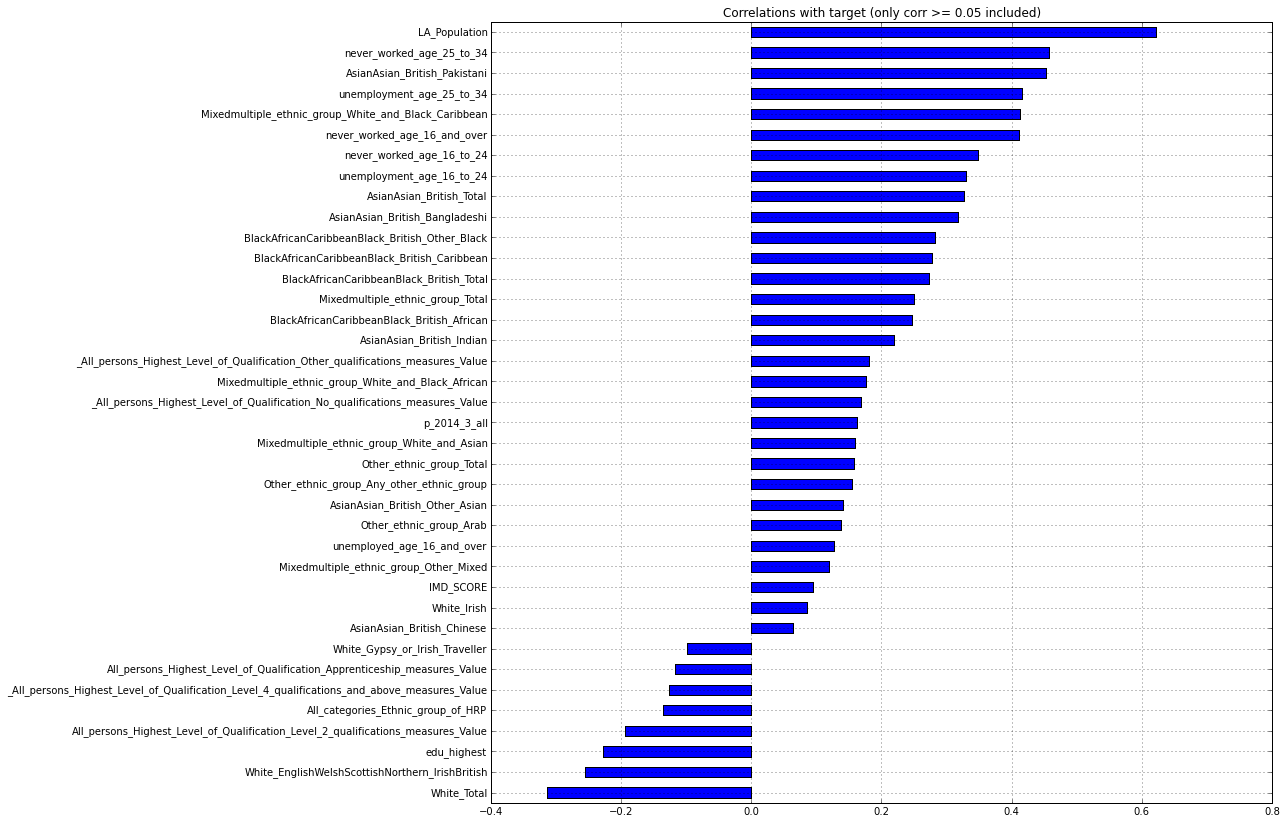

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 14)
correlation_with_target = train_filled[predictors + ['TOTAL_Presented_Young_ppl_2014']].corr()['TOTAL_Presented_Young_ppl_2014'].order()
correlation_with_target[ np.abs(correlation_with_target) > 0.05][:-1].plot(kind='barh', title='Correlations with target (only corr >= 0.05 included)')

In [16]:
predictors

['unemployed_age_16_and_over',
 'unemployment_age_16_to_24',
 'unemployment_age_25_to_34',
 'never_worked_age_16_and_over',
 'never_worked_age_16_to_24',
 'never_worked_age_25_to_34',
 'All_categories_Ethnic_group_of_HRP',
 'White_Total',
 'White_EnglishWelshScottishNorthern_IrishBritish',
 'White_Irish',
 'White_Gypsy_or_Irish_Traveller',
 'White_Other_White',
 'Mixedmultiple_ethnic_group_Total',
 'Mixedmultiple_ethnic_group_White_and_Black_Caribbean',
 'Mixedmultiple_ethnic_group_White_and_Black_African',
 'Mixedmultiple_ethnic_group_White_and_Asian',
 'Mixedmultiple_ethnic_group_Other_Mixed',
 'AsianAsian_British_Total',
 'AsianAsian_British_Indian',
 'AsianAsian_British_Pakistani',
 'AsianAsian_British_Bangladeshi',
 'AsianAsian_British_Chinese',
 'AsianAsian_British_Other_Asian',
 'BlackAfricanCaribbeanBlack_British_Total',
 'BlackAfricanCaribbeanBlack_British_African',
 'BlackAfricanCaribbeanBlack_British_Caribbean',
 'BlackAfricanCaribbeanBlack_British_Other_Black',
 'Other_ethn

### Feature selection

Let's pick only one or two predictors form each category (education, unemployment, ethnicity).

In [17]:
picked_predictors = ['LA_Population', 'p_2014_3_all', 'BlackAfricanCaribbeanBlack_British_African', 'unemployment_age_25_to_34', 'edu_highest', 'White_Total']

test_filled[picked_predictors].corr()

,LA_Population,p_2014_3_all,BlackAfricanCaribbeanBlack_British_African,unemployment_age_25_to_34,edu_highest,White_Total
LA_Population,1.000000,0.226007,0.338966,0.497759,-0.254890,-0.405819
p_2014_3_all,0.226007,1.000000,0.573885,0.529871,-0.136574,-0.481837
BlackAfricanCaribbeanBlack_British_African,0.338966,0.573885,1.000000,0.693877,-0.354424,-0.755480
unemployment_age_25_to_34,0.497759,0.529871,0.693877,1.000000,-0.357171,-0.736066
edu_highest,-0.254890,-0.136574,-0.354424,-0.357171,1.000000,0.600132
White_Total,-0.405819,-0.481837,-0.755480,-0.736066,0.600132,1.000000


In [18]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="TOTAL_Presented_Young_ppl_2014 ~ {0}".format(' + '.join(picked_predictors)), data=train_filled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     TOTAL_Presented_Young_ppl_2014   R-squared:                       0.410
Model:                                        OLS   Adj. R-squared:                  0.382
Method:                             Least Squares   F-statistic:                     14.61
Date:                            Mon, 10 Aug 2015   Prob (F-statistic):           1.30e-12
Time:                                    22:45:43   Log-Likelihood:                -938.75
No. Observations:                             133   AIC:                             1891.
Df Residuals:                                 126   BIC:                             1912.
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
Intercept                                   -626.5620   1315.568     -0.476      0.635     -3230.033  1976.909
LA_Population                                  0.0016      0.000      7.001      0.000         0.001     0.002
p_2014_3_all                               -1.354e+05   1.67e+05     -0.812      0.418     -4.65e+05  1.95e+05
BlackAfricanCaribbeanBlack_British_African   516.4700   5229.915      0.099      0.921     -9833.379  1.09e+04
unemployment_age_25_to_34                   9316.5626   4310.373      2.161      0.033       786.461  1.78e+04
edu_highest                                   67.7446   1793.902      0.038      0.970     -3482.335  3617.824
White_Total                                  960.9878    992.149      0.969      0.335     -1002.446  2924.422
==============================================================================
Omnibus:                       72.421   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.921
Skew:                           1.997   Prob(JB):                     4.53e-66
Kurtosis:                       9.193   Cond. No.                     1.41e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### K nearest neighbors

This is the typical point of call when dealing with nonlinearities. As far as I understand, it is a kind of groupping of LAs based on their stats, and assigning similar target values for these groups.

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error
nn = KNeighborsRegressor(n_neighbors=4)
nn.fit(train_filled[picked_predictors], train_filled['TOTAL_Presented_Young_ppl_2014'])

pred = nn.predict(train_filled[picked_predictors])
def print_metrics(target, prediction):
    print('R^2 = {0}'.format(r2_score(target, prediction)))
    print('Mean error = {0}'.format(mean_absolute_error(target, prediction)))
    print('Median error = {0}'.format(median_absolute_error(target, prediction)))
    
print_metrics(train_filled['TOTAL_Presented_Young_ppl_2014'], pred)

R^2 = 0.5061343022038494
Mean error = 160.2107065551692
Median error = 80.625


In [28]:
from sklearn import cross_validation

scores = cross_validation.cross_val_score(nn, train_filled[picked_predictors], train_filled['TOTAL_Presented_Young_ppl_2014'], scoring='mean_absolute_error', cv=5)
print("Mean absolute error in 5-fold cross-validation:", np.abs(scores))

Mean absolute error in 5-fold cross-validation: [ 257.76060126  150.93073302  149.55662041  165.93473932  317.6379365 ]
